# Project Objectives

## 1.Clean and Prepare Data

- Import feedback CSV (Google Form export) and perform data cleaning (handling duplicates, missing values, and formatting text).

## 2.Analyze Quantitative Feedback (Ratings)

- Study rating distributions (1–5 scale) across events, departments, and event types to uncover patterns of satisfaction.

## 3.Perform Sentiment Analysis on Comments

- Apply TextBlob/VADER to classify textual feedback into positive, neutral, or negative sentiment.

- Generate word clouds to highlight common themes in student responses.

## 4.Visualize Satisfaction Trends

- Create bar charts, pie charts, and other visualizations (using seaborn/matplotlib) to clearly present satisfaction levels and pain points.

## 5.Provide Actionable Recommendations

- Combine insights from ratings and sentiment analysis to suggest improvements for future campus events (e.g., logistics, content, engagement)

In [1]:
import pandas as pd 

# Lets have a look at the  two datasets and decide on which one to use for the analysis

# `Dataset 1`

In [2]:
data_1= pd.read_csv('student_feedback.csv',index_col = 0)
data_1.tail()

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
996,55,8,7,6,2,5,7,7,9
997,913,5,5,6,5,6,7,6,1
998,199,9,5,8,3,8,1,1,2
999,539,10,2,7,4,3,4,10,1
1000,759,7,2,4,2,1,5,9,9


In [3]:
from IPython.display import display, Markdown

# Bold section titles
display(Markdown("## **DATA OVERVIEW**"))
display(Markdown("**Preview of the first five rows:**"))
display(data_1.head())

display(Markdown(f"**Dataset shape:** {data_1.shape}"))
display(Markdown(f"**Dataset columns:** {list(data_1.columns)}"))

display(Markdown("## **DATA TYPES**"))
display(Markdown("**Data types:**"))
display(data_1.dtypes)

display(Markdown("## **META DATA**"))
display(Markdown("**Meta data:**"))
display(data_1.info()) 

display(Markdown("## **STATISTICAL SUMMARY**"))
display(Markdown("**Statistical summary:**"))
display(data_1.describe().round(2))

display(Markdown("## **MISSING VALUES**"))
display(Markdown("**Missing Values:**"))
display(data_1.isna().sum())

display(Markdown("## **DUPLICATES**"))
display(Markdown("**Duplicates:**"))
display(data_1.duplicated().value_counts())


## **DATA OVERVIEW**

**Preview of the first five rows:**

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


**Dataset shape:** (1001, 9)

**Dataset columns:** ['Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']

## **DATA TYPES**

**Data types:**

Student ID                                              int64
Well versed with the subject                            int64
Explains concepts in an understandable way              int64
Use of presentations                                    int64
Degree of difficulty of assignments                     int64
Solves doubts willingly                                 int64
Structuring of the course                               int64
Provides support for students going above and beyond    int64
Course recommendation based on relevance                int64
dtype: object

## **META DATA**

**Meta data:**

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Student ID                                            1001 non-null   int64
 1   Well versed with the subject                          1001 non-null   int64
 2   Explains concepts in an understandable way            1001 non-null   int64
 3   Use of presentations                                  1001 non-null   int64
 4   Degree of difficulty of assignments                   1001 non-null   int64
 5   Solves doubts willingly                               1001 non-null   int64
 6   Structuring of the course                             1001 non-null   int64
 7   Provides support for students going above and beyond  1001 non-null   int64
 8   Course recommendation based on relevance              1001 non-null   int64
dtypes: 

None

## **STATISTICAL SUMMARY**

**Statistical summary:**

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.00,1001.00,1001.00,1001.00,1001.00,1001.00,1001.00,1001.00,1001.00
mean,500.00,7.50,6.08,5.94,5.43,5.47,5.64,5.66,5.60
std,289.11,1.69,2.60,1.42,2.87,2.87,2.92,2.89,2.89
min,0.00,5.00,2.00,4.00,1.00,1.00,1.00,1.00,1.00
25%,250.00,6.00,4.00,5.00,3.00,3.00,3.00,3.00,3.00
50%,500.00,8.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00
75%,750.00,9.00,8.00,7.00,8.00,8.00,8.00,8.00,8.00
max,1000.00,10.00,10.00,8.00,10.00,10.00,10.00,10.00,10.00


## **MISSING VALUES**

**Missing Values:**

Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64

## **DUPLICATES**

**Duplicates:**

False    1001
Name: count, dtype: int64

# `Dataset 2`

# Project Objectives

## 1.Clean and Prepare Data

- Import feedback CSV (Google Form export) and perform data cleaning (handling duplicates, missing values, and formatting text).

## 2.Analyze Quantitative Feedback (Ratings)

- Study rating distributions (1–5 scale) across events, departments, and event types to uncover patterns of satisfaction.

## 3.Perform Sentiment Analysis on Comments

- Apply TextBlob/VADER to classify textual feedback into positive, neutral, or negative sentiment.

- Generate word clouds to highlight common themes in student responses.

## 4.Visualize Satisfaction Trends

- Create bar charts, pie charts, and other visualizations (using seaborn/matplotlib) to clearly present satisfaction levels and pain points.

## 5.Provide Actionable Recommendations

- Combine insights from ratings and sentiment analysis to suggest improvements for future campus events (e.g., logistics, content, engagement)

In [4]:
data_2 = pd.read_csv('Student_Satisfaction_Survey.csv',encoding = 'latin1')
data_2.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [5]:
data_2.duplicated().value_counts()

False    580
Name: count, dtype: int64

In [6]:
data_2.isna().sum()

SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1             0
Weightage 2             0
Weightage 3             0
Weightage 4             0
Weightage 5             0
Average/ Percentage     0
Course Name             0
Basic Course            0
dtype: int64

In [7]:
from IPython.display import display, Markdown

display(Markdown("## **DATA OVERVIEW**"))
display(Markdown("**Preview of the first five rows:**"))
display(data_2.head())

display(Markdown(f"**Dataset shape:** {data_2.shape}"))
display(Markdown(f"**Dataset columns:** {list(data_2.columns)}"))

display(Markdown("## **DATA TYPES**"))
display(Markdown("**Data types:**"))
display(data_2.dtypes)

display(Markdown("## **META DATA**"))
display(Markdown("**Meta data:**"))
display(data_2.info()) 

display(Markdown("## **STATISTICAL SUMMARY**"))
display(Markdown("**Statistical summary:**"))
display(data_2.describe().round(2))

display(Markdown("## **MISSING VALUES**"))
display(Markdown("**Missing Values:**"))
display(data_2.isna().sum())

display(Markdown("## **DUPLICATES**"))
display(Markdown("**Duplicates:**"))
display(data_2.duplicated().value_counts())


## **DATA OVERVIEW**

**Preview of the first five rows:**

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


**Dataset shape:** (580, 12)

**Dataset columns:** ['SN', 'Total Feedback Given', 'Total Configured', 'Questions', 'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course']

## **DATA TYPES**

**Data types:**

SN                       int64
Total Feedback Given     int64
Total Configured         int64
Questions               object
Weightage 1              int64
Weightage 2              int64
Weightage 3              int64
Weightage 4              int64
Weightage 5              int64
Average/ Percentage     object
Course Name             object
Basic Course            object
dtype: object

## **META DATA**

**Meta data:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


None

## **STATISTICAL SUMMARY**

**Statistical summary:**

,SN,Total Feedback Given,Total Configured,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5
count,580.00,580.00,580.00,580.00,580.00,580.00,580.00,580.00
mean,10.50,14.31,92.52,0.53,1.19,2.54,5.08,4.97
std,5.77,16.49,114.49,1.31,1.69,3.19,7.29,6.49
min,1.00,1.00,12.00,0.00,0.00,0.00,0.00,0.00
25%,5.75,3.00,20.00,0.00,0.00,0.00,1.00,1.00
50%,10.50,7.00,42.00,0.00,0.00,1.00,3.00,3.00
75%,15.25,17.00,123.00,1.00,2.00,3.25,6.00,6.00
max,20.00,74.00,559.00,19.00,8.00,26.00,52.00,38.00


## **MISSING VALUES**

**Missing Values:**

SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1             0
Weightage 2             0
Weightage 3             0
Weightage 4             0
Weightage 5             0
Average/ Percentage     0
Course Name             0
Basic Course            0
dtype: int64

## **DUPLICATES**

**Duplicates:**

False    580
Name: count, dtype: int64

In [8]:
data_2['Course Name '].value_counts()

Course Name 
FY B.VOC FOOD TECHNOLOGY            20
MSC DATA SCIENCE - 3                20
TYBMS                               20
TYBCOM                              20
TYBA                                20
SY COMPUTER SCIENCE                 20
SYBSC                               20
SYBMS                               20
SYBCOM                              20
S.Y.B.A.F                           20
MSC PHYSICS - 3                     20
MSC ORGANIC CHEMISTRY - 3           20
MSC MICROBIOLOGY - 3                20
MSC INFORMATION TECHNOLOGY - 3      20
M.SC PART - 2 COMPUTER SCIENCE      20
FYBA                                20
MSC ANALYTICAL CHEMISTRY SEM III    20
MSC MICROBIOLOGY - 1                20
MSC INFORMATION TECHNOLOGY - 1      20
MSC DATA SCIENCE - 1                20
MSC ANALYTICAL CHEMISTRY SEM I      20
M.SC PART - 1 COMPUTER SCIENCE      20
MA PSYCHOLOGY - 3                   20
MA PSYCHOLOGY - 1                   20
FYBSC                               20
FYBMS       

In [9]:
data_2.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course'],
      dtype='object')

In [10]:
from IPython.display import display, Markdown
display(Markdown("## **VALUE COUNTS PER COLUMN**"))


## **VALUE COUNTS PER COLUMN**

In [11]:
display(Markdown("## **VALUE COUNTS PER COLUMN**"))

for col in data_2.columns:
    display(Markdown(f"### Column: `{col}`"))
    display(data_2[col].value_counts().to_frame().head(10))  # top 10 values
    display(Markdown("---"))


## **VALUE COUNTS PER COLUMN**

### Column: `SN`

,count
SN,
1,29
2,29
19,29
18,29
17,29
16,29
15,29
14,29
13,29


---

### Column: `Total Feedback Given`

,count
Total Feedback Given,
7,80
1,60
3,60
4,40
2,40
14,40
17,40
26,20
12,20


---

### Column: `Total Configured`

,count
Total Configured,
20,80
24,60
12,20
22,20
105,20
331,20
118,20
48,20
159,20


---

### Column: `Questions`

,count
Questions,
How much of the syllabus was covered in the class?,29
How well did the teachers prepare for the classes?,29
"What percentage of teachers use ICT tools such as LCD projectors, Multimedia, etc. while teaching?",29
"Efforts are made by the institute/ teachers to inculcate soft skills, life skills and employability skills to make you ready for the world of work.",29
Teachers encourage you to participate in extracurricular activities.,29
"The institute/ teachers use student-centric methods, such as experiential learning, participative learning and problem-solving methodologies for enhancing learning experiences.",29
"The institution makes effort to engage students in the monitoring, review and continuous quality improvement of the teaching-learning process.",29
Teachers are able to identify your weaknesses and help you to overcome them.,29
The teachers identify your strengths and encourage you to provide the proper level of challenges.,29


---

### Column: `Weightage 1`

,count
Weightage 1,
0,407
1,112
2,36
3,12
4,6
6,2
19,1
10,1
9,1


---

### Column: `Weightage 2`

,count
Weightage 2,
0,291
1,123
2,64
3,41
4,25
5,15
7,10
6,9
8,2


---

### Column: `Weightage 3`

,count
Weightage 3,
0,164
1,131
2,79
3,61
4,41
5,26
6,17
7,14
8,13


---

### Column: `Weightage 4`

,count
Weightage 4,
1,108
0,103
2,72
3,66
4,37
5,31
6,22
7,21
8,18


---

### Column: `Weightage 5`

,count
Weightage 5,
0,122
1,113
2,51
3,50
4,42
6,30
5,29
8,16
13,16


---

### Column: `Average/ Percentage`

,count
Average/ Percentage,
4.00 / 80.00,59
3.00 / 60.00,38
5.00 / 100.00,34
4.50 / 90.00,22
3.50 / 70.00,21
3.67 / 73.33,21
3.71 / 74.29,14
3.33 / 66.67,11
4.43 / 88.57,11


---

### Column: `Course Name `

,count
Course Name,
FY B.VOC FOOD TECHNOLOGY,20
MSC DATA SCIENCE - 3,20
TYBMS,20
TYBCOM,20
TYBA,20
SY COMPUTER SCIENCE,20
SYBSC,20
SYBMS,20
SYBCOM,20


---

### Column: `Basic Course`

,count
Basic Course,
BACHELOR OF MANAGEMENT STUDIES,60
BACHELOR OF SCIENCE,60
BACHELOR OF ARTS,40
BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE),40
MA PSYCHOLOGY,40
MSC COMPUTER SCIENCE,40
MSC ANALYTICAL CHEMISTRY,40
MSC DATA SCIENCE,40
MSC INFORMATION TECHNOLOGY,40


---

# 🔹 Step 2. Analyze Quantitative Feedback (Ratings)

- The Weightage 1–5 columns, represent the count of how many students gave that rating for each question

- To get the distribution of ratings across all questions:

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate all weightages
rating_distribution = data_2[['Weightage 1','Weightage 2','Weightage 3','Weightage 4','Weightage 5']].sum()
rating_distribution.value_counts()

306     1
689     1
1472    1
2948    1
2885    1
Name: count, dtype: int64

In [13]:
rating_distribution.index

Index(['Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5'],
      dtype='object')

In [14]:
rating_distribution.values

array([ 306,  689, 1472, 2948, 2885], dtype=int64)

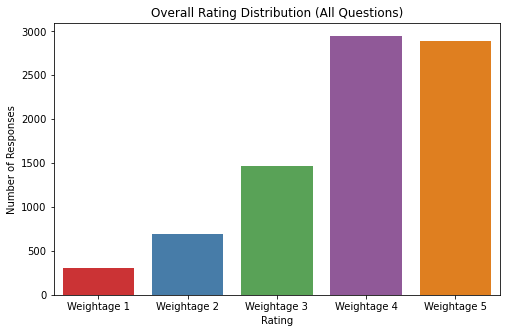

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette="Set1")
plt.title("Overall Rating Distribution (All Questions)")
plt.ylabel("Number of Responses")
plt.xlabel("Rating")
plt.show()

- To compare departments/courses:

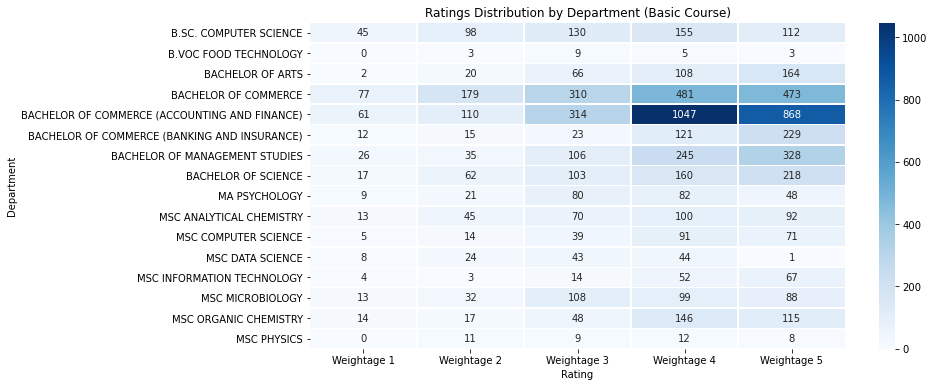

In [16]:
# Group by Basic Course
dept_ratings = data_2.groupby("Basic Course")[['Weightage 1','Weightage 2','Weightage 3','Weightage 4','Weightage 5']].sum()

plt.figure(figsize=(12,6))
sns.heatmap(dept_ratings, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title("Ratings Distribution by Department (Basic Course)")
plt.ylabel("Department")
plt.xlabel("Rating")
plt.show()

# 🔹 Step 3. Sentiment Analysis on Ratings (Instead of Comments)

- Since the dataset does not include open-ended comments, we **map ratings to sentiment categories**:
  - **Positive** → Ratings of 4 and 5  
  - **Neutral** → Rating of 3  
  - **Negative** → Ratings of 1 and 2  

- This allows us to analyze how students’ feedback sentiment varies across different departments/courses.


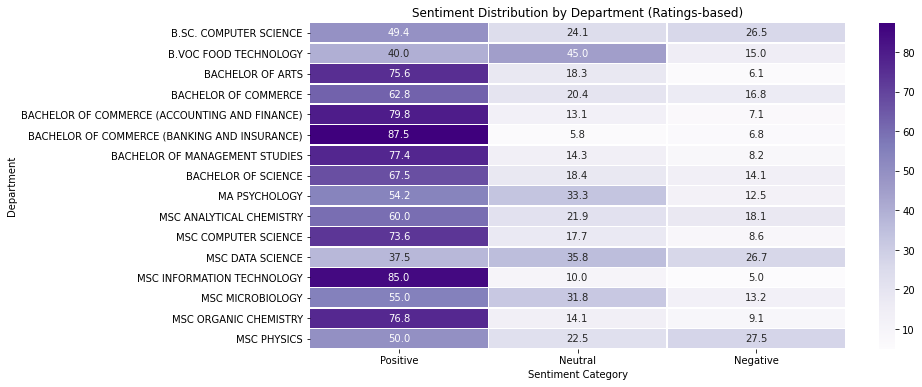

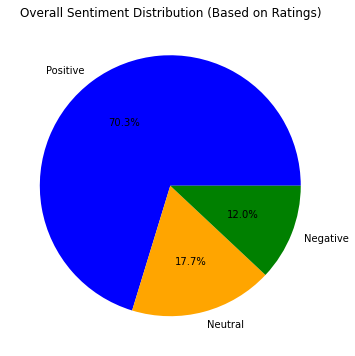

In [17]:
import pandas as pd

# Convert ratings into sentiment counts
data_2['Positive'] = data_2['Weightage 4'] + data_2['Weightage 5']
data_2['Neutral']  = data_2['Weightage 3']
data_2['Negative'] = data_2['Weightage 1'] + data_2['Weightage 2']

# Aggregate by department
dept_sentiments = data_2.groupby("Basic Course")[['Positive','Neutral','Negative']].sum()

# Normalize to percentages (for fair comparison)
dept_sentiments_pct = dept_sentiments.div(dept_sentiments.sum(axis=1), axis=0) * 100

# PLOT
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(dept_sentiments_pct, annot=True, cmap="Purples", fmt=".1f", linewidths=0.5)
plt.title("Sentiment Distribution by Department (Ratings-based)")
plt.ylabel("Department")
plt.xlabel("Sentiment Category")
plt.show()

# Overall sentiment pie chart
overall = dept_sentiments.sum()
overall.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6),  colors=["blue", "orange","green"])
plt.title("Overall Sentiment Distribution (Based on Ratings)")
plt.ylabel("")
plt.show()


In [18]:
data_2.tail(2)

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Positive,Neutral,Negative
578,19,9,170,What percentage of teachers use ICT tools such...,0,0,1,3,5,4.44 / 88.89,TYBSC,BACHELOR OF SCIENCE,8,1,0
579,20,9,170,The overall quality of the teaching-learning p...,0,0,1,2,6,4.56 / 91.11,TYBSC,BACHELOR OF SCIENCE,8,1,0


# 🔹 Step 4. Visualize Satisfaction Trends

Bar chart of average scores per question:

# Compare across departments:

In [19]:
data_2["Average_Score"] = data_2["Average/ Percentage"].str.split("/").str[0].astype(float)

# ==============================
 # Visualize Satisfaction Trends
# ==============================


# ---------------------------------
# 1. Average Score by Question
# ==============================

<ipython-input-20-a9112b454349>:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


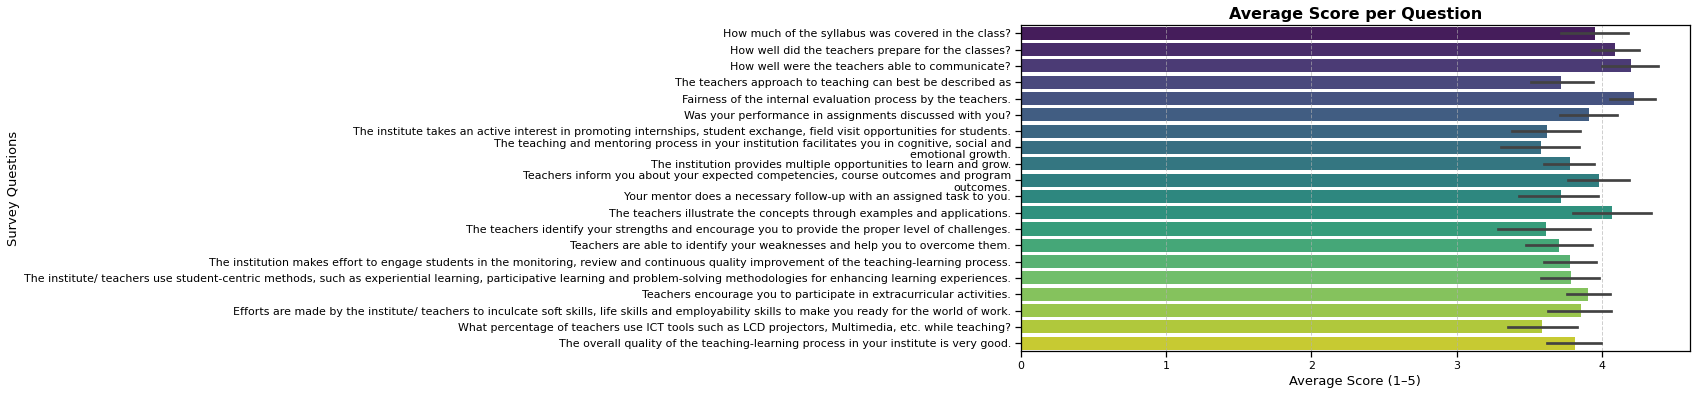

In [20]:
import unicodedata
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Step 1: Clean up problematic glyphs in Questions
def clean_text(x: str) -> str:
    x = str(x)
    x = unicodedata.normalize("NFKC", x)  # normalize weird unicode
    # replace common curly quotes/dashes
    x = (x.replace("\u2018", "'")
           .replace("\u2019", "'")
           .replace("\u201C", '"')
           .replace("\u201D", '"')
           .replace("\u2013", "-")
           .replace("\u2014", "-"))
    # fallback: drop anything non-ASCII
    x = x.encode("ascii", "ignore").decode("ascii")
    return x

data_2["Questions"] = data_2["Questions"].map(clean_text)

# 🔹 Step 2: Set a robust font + disable unicode minus
mpl.rcParams["font.family"] = "DejaVu Sans"
mpl.rcParams["axes.unicode_minus"] = False
sns.set_context("notebook")

# 🔹 Step 3: Plot (with better style)
plt.figure(figsize=(12,6))
sns.barplot(
    x="Average_Score", 
    y="Questions", 
    data=data_2, 
    palette="viridis"
)
plt.title("Average Score per Question", fontsize=16, weight="bold")
plt.xlabel("Average Score (1–5)", fontsize=13)
plt.ylabel("Survey Questions", fontsize=13)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


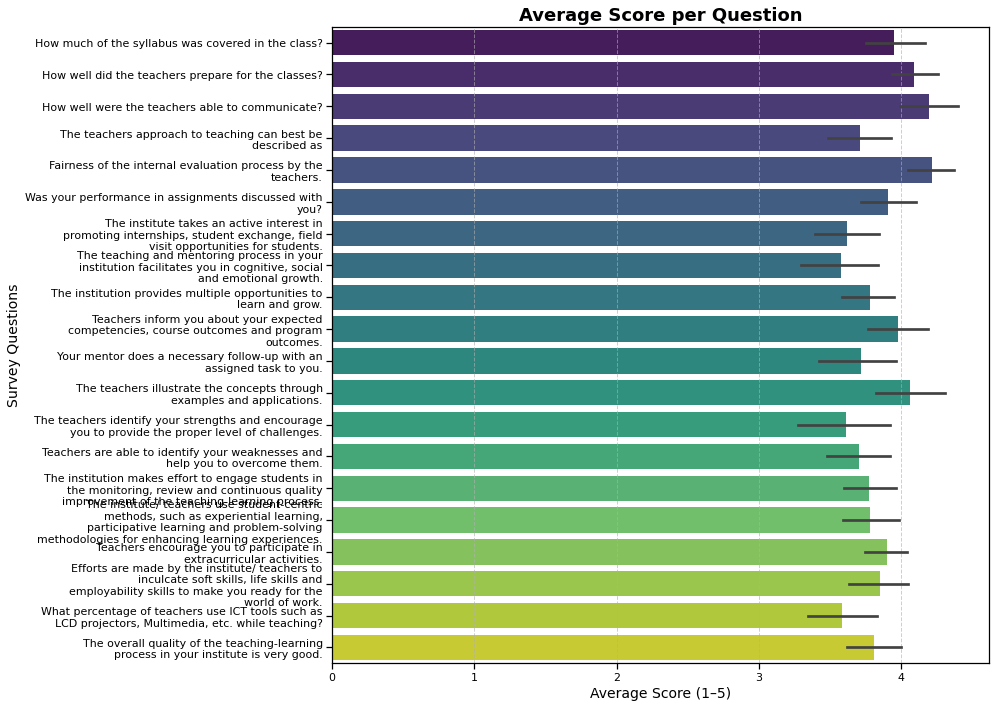

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Wrap long question labels (max 50 chars per line)
data_2["Questions_wrapped"] = data_2["Questions"].apply(
    lambda x: "\n".join(textwrap.wrap(x, width=50))
)

plt.figure(figsize=(14,10))
sns.barplot(
    x="Average_Score", 
    y="Questions_wrapped", 
    data=data_2, 
    palette="viridis"
)

plt.title("Average Score per Question", fontsize=18, weight="bold")
plt.xlabel("Average Score (1–5)", fontsize=14)
plt.ylabel("Survey Questions", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


# ---------------------------------
# 2. Overall Sentiment Pie Chart
# ---------------------------------

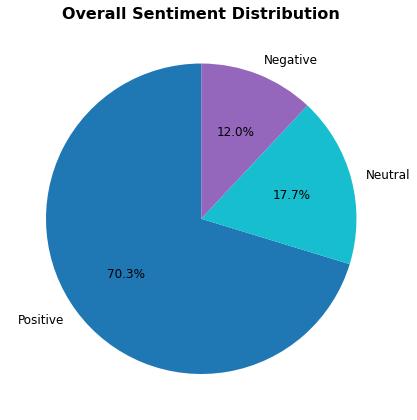

In [22]:
overall = data_2[['Positive','Neutral','Negative']].sum()

# Better color combo (blue family + accent colors)
colors = ["#1f77b4",  
          "#17becf",  
          "#9467bd"]   

plt.figure(figsize=(6,6))
overall.plot(kind="pie", autopct="%1.1f%%", 
             colors=colors, startangle=90, 
             textprops={'fontsize':12})

plt.title("Overall Sentiment Distribution", fontsize=16, weight="bold")
plt.ylabel("")
plt.tight_layout()
plt.show()


# ---------------------------------
# 3. Sentiment by Department (Stacked Bar)
# ---------------------------------

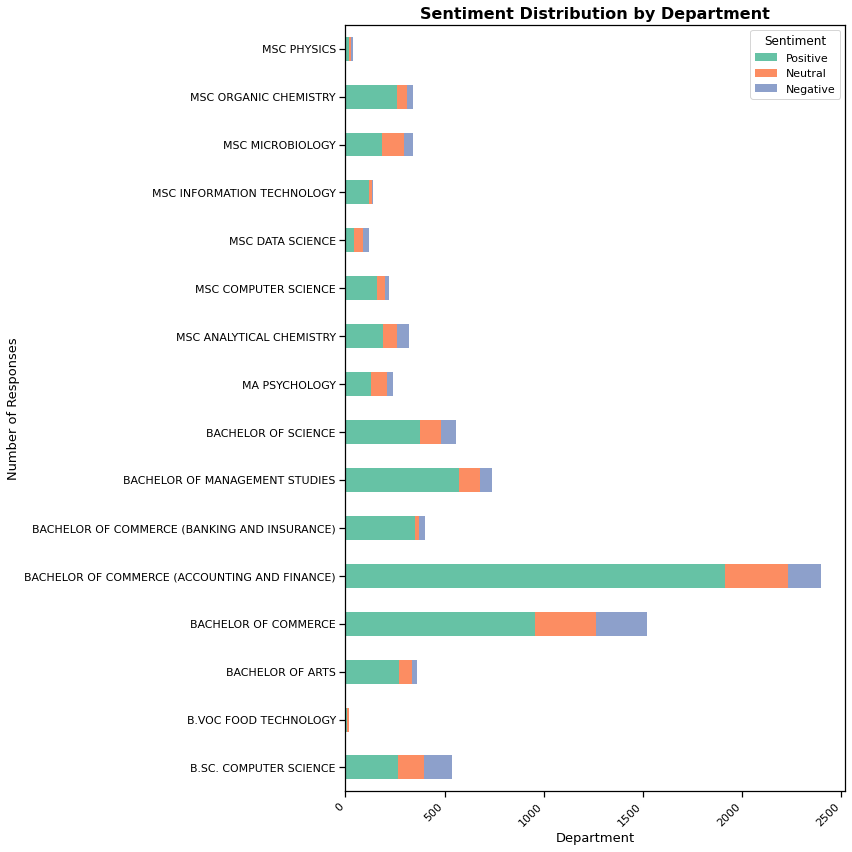

In [23]:
dept_sentiments = data_2.groupby("Basic Course")[['Positive','Neutral','Negative']].sum()
dept_sentiments = dept_sentiments[['Positive','Neutral','Negative']]

ax = dept_sentiments.plot(kind="barh", stacked=True, figsize=(12,12),
                          color={"Positive":"#66c2a5",   
                                 "Neutral":"#fc8d62",  
                                 "Negative":"#8da0cb"}) 

plt.title("Sentiment Distribution by Department", fontsize=16, weight="bold")
plt.xlabel("Department", fontsize=13)
plt.ylabel("Number of Responses", fontsize=13)
plt.legend(title="Sentiment")

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right", fontsize=11)

plt.tight_layout()
plt.show()




# ---------------------------------
# 4. Overall Rating Distribution (1–5)
# ---------------------------------

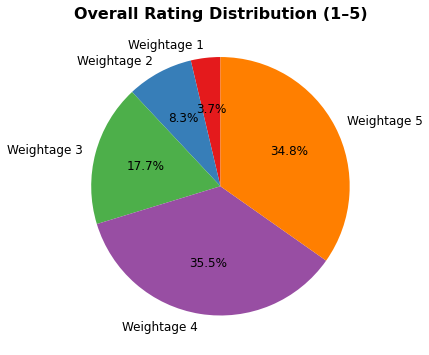

In [24]:
ratings = data_2[["Weightage 1","Weightage 2","Weightage 3","Weightage 4","Weightage 5"]].sum()

plt.figure(figsize=(6,6))
ratings.plot(kind="pie", autopct="%1.1f%%", 
             colors=sns.color_palette("Set1", 5), startangle=90, textprops={'fontsize':12})
plt.title("Overall Rating Distribution (1–5)", fontsize=16, weight="bold")
plt.ylabel("")
plt.tight_layout()
plt.show()


# ---------------------------------
# 5. Trend of Average Scores Across Questions
# ---------------------------------

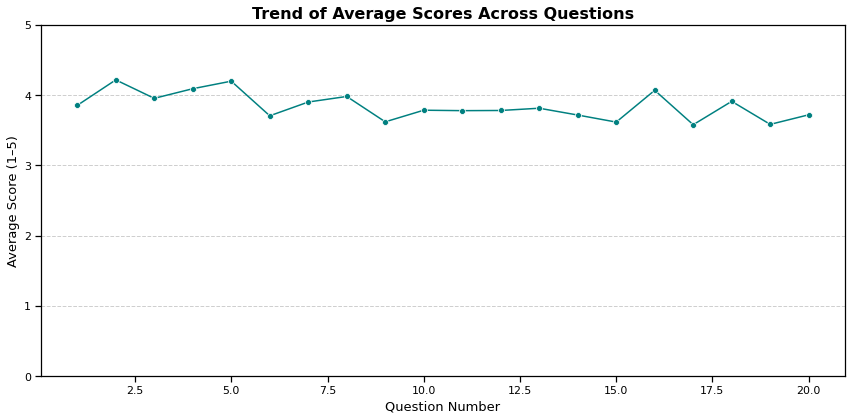

In [25]:

question_avg = data_2.groupby("Questions")["Average_Score"].mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=range(1, len(question_avg)+1), y=question_avg.values, marker="o", color="teal")
plt.title("Trend of Average Scores Across Questions", fontsize=16, weight="bold")
plt.xlabel("Question Number", fontsize=13)
plt.ylabel("Average Score (1–5)", fontsize=13)
plt.ylim(0, 5)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [26]:
data_2

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Positive,Neutral,Negative,Average_Score,Questions_wrapped
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0,1,0,3.00,How much of the syllabus was covered in the cl...
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,1,0,0,5.00,How well did the teachers prepare for the clas...
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,1,0,0,5.00,How well were the teachers able to communicate?
3,4,1,12,The teachers approach to teaching can best be ...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0,1,0,3.00,The teachers approach to teaching can best be\...
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,1,0,0,4.00,Fairness of the internal evaluation process by...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,16,9,170,The institute/ teachers use student-centric me...,1,0,0,2,6,4.33 / 86.67,TYBSC,BACHELOR OF SCIENCE,8,0,1,4.33,The institute/ teachers use student-centric\nm...
576,17,9,170,Teachers encourage you to participate in extra...,0,0,0,3,6,4.67 / 93.33,TYBSC,BACHELOR OF SCIENCE,9,0,0,4.67,Teachers encourage you to participate in\nextr...
577,18,9,170,Efforts are made by the institute/ teachers to...,0,0,1,2,6,4.56 / 91.11,TYBSC,BACHELOR OF SCIENCE,8,1,0,4.56,Efforts are made by the institute/ teachers to...
578,19,9,170,What percentage of teachers use ICT tools such...,0,0,1,3,5,4.44 / 88.89,TYBSC,BACHELOR OF SCIENCE,8,1,0,4.44,What percentage of teachers use ICT tools such...


In [27]:
# data_2.to_csv("FinalData.csv",index = False)